<a href="https://colab.research.google.com/github/Adam5567/DataScience-Python-Notebooks/blob/master/Smoke_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook builds a machine learning model (ML) to predict if a smoke detector (or smoke alarm) will activate based on several different factors. The notebook uses a few different ML model types in an effort to find the best fit.

In [12]:
#common imports

import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving smoke_detection_iot.csv to smoke_detection_iot.csv


In [3]:
df = pd.read_csv('smoke_detection_iot.csv')

In [4]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
#We want to decide which features would be best for our ML model,
#so lets take a look at the correlations.
df.corr()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Unnamed: 0,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
UTC,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


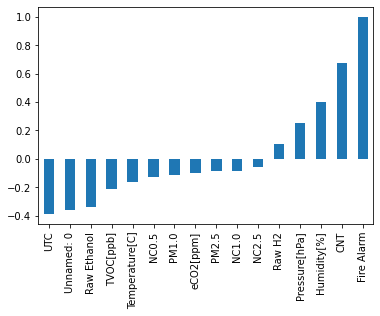

In [9]:
#This graph shows the correlation as compared to the Fire Alarm column (which will be our respone column)
#Because some graphs have a negative correlation, we can safely remove them for our purposes
df.corr()['Fire Alarm'].sort_values().plot(kind='bar')

In [10]:
#dropping the columns
delete =['Unnamed: 0' , 'CNT' , 'Raw Ethanol', 'Pressure[hPa]', 'UTC', 
      'Humidity[%]' , 'PM1.0', 'PM1.0' , 'NC0.5' ,'NC1.0' ,'NC2.5']
df1 = df.drop(delete, axis=1) 

If all classifiers are able to estimate class probabilities (that is, they all have a predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called soft voting

In [15]:
#The variables will be our X and the Fire Alarm will be our response (y)
#We then split this data into training and test sets
X = df1.drop("Fire Alarm", axis = 1).values
y = df1['Fire Alarm'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#We can run several classifiers at once (given the binary input of Fire Alarm)

from sklearn.utils.extmath import randomized_range_finder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs', random_state = 42)
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm_clf = SVC(gamma = "scale", random_state = 42)

voting_clf = VotingClassifier(estimators = [('lr', log_clf),  ('rf', rnd_clf), ('svc', svm_clf)],
                              voting = 'hard') #voting 'soft'

In [17]:
#Training the several classifiers
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [18]:
#We can see which classifier "works" best
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7450902123582948
RandomForestClassifier 0.9996806642184257
SVC 0.8950183618074405
VotingClassifier 0.8970940443876736


In [19]:
#further classifier training
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_estimators=500,
                            max_samples = 100, bootstrap = True, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, random_state=42)

In [20]:
#evaluation of the bagging classifier
print(accuracy_score(y_test, y_pred))

0.8970940443876736


In [21]:
#training and evaluation of the decision tree classifer
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.9992016605460642


#Of all of the models, the Decision Tree Classifier and the Random Forest Classifier performed the best, both with an accuracy score of 99.9%. This is due to the tweaking of their input parameters to better handle the data.